# Applications of Linear Systems and Matrix Algebra


The need to solve linear systems arises in a wide variety of fields.  We show in this section an example of the linear system that arises in fitting a curve to a data set.  We also discuss the application of matrix algebra to cryptography and graph theory.

## Interpolation (Application#1)

Interpolation is the process of estimating unknown data values that fall between known values.  This process commonly involves fitting a curve through the known set of data points in order to make predictions about the unknown values.  The curve is described by a set of parameters, and "fitting the curve" means choosing the parameters such that the curve best represents the data.  A simple way to fit a curve is to require that it passes through all the data provided.  

Let's look at the the data points $(2,8)$, $(5,12)$, $(6,14)$, and $(15,15)$ as an example.

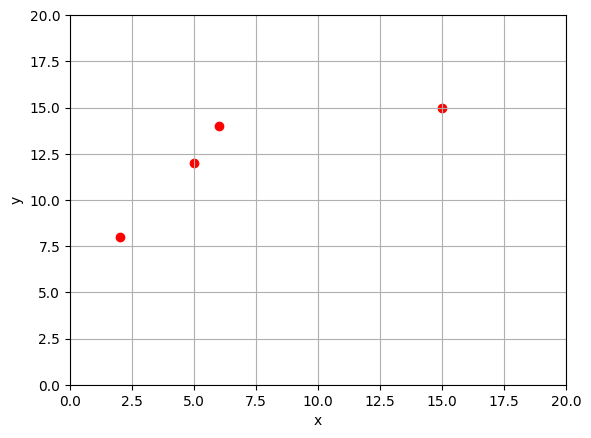

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import laguide as lag

x = np.array([2,5,6,15])
y = np.array([8,12,14,15])

fig,ax = plt.subplots()
ax.scatter(x,y,color='red');

ax.set_xlim(0,20);
ax.set_ylim(0,20);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.grid(True)

Polynomials are a common curve used for interpolation.  In this case, since we have four data points there will be four equations that must be satisfied for the graph to pass through each point.  We will choose a third degree polynomial, $P_3$, since that will give us four parameters with which to satisfy the equations.

$$
\begin{equation}
P_3(x) = a_0 + a_1x + a_2x^2 + a_3x^3
\end{equation}
$$

The data gives us the four equations $P_3(2) = 8$, $P_3(5) = 12$, $P_3(6) = 14$, and $P_3(15) = 15$.  This set of equations is a linear system for the unknown coefficients.


$$
\begin{eqnarray*}
a_0 + 2a_1 + 2^2a_2 + 2^3a_3 & = & 8\\
a_0 + 5a_1 + 5^2a_2 + 5^3a_3 & = & 12\\
a_0 + 6a_1 + 6^2a_2 + 6^3a_3 & = & 14\\
a_0 + 15a_1 + 15^2a_2 + 15^3a_3 & = & 15
\end{eqnarray*}
$$

We assemble the matrix $A$ and right-hand side vector $B$ as NumPy arrays.

In [2]:
A = np.zeros((4,4))
B = np.zeros((4,1))

for i in range(4):
    B[i,0] = y[i]
    for j in range(4):
        A[i,j] = x[i]**(j)
        
print(A,'\n')
print(B)

[[1.000e+00 2.000e+00 4.000e+00 8.000e+00]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]] 

[[ 8.]
 [12.]
 [14.]
 [15.]]


Now we can solve the system $AX=B$ with elimination.  To avoid confusion with the $x$ variable, we will label our solution $\texttt{coeffs}$ since they represent the coefficients of the polynomial.

In [3]:
coeffs = lag.SolveSystem(A,B)
print(coeffs)

[[ 8.64102564]
 [-1.25555556]
 [ 0.52222222]
 [-0.02735043]]


Finally, we plot the graph of the polynomial over the data to see the fit. 

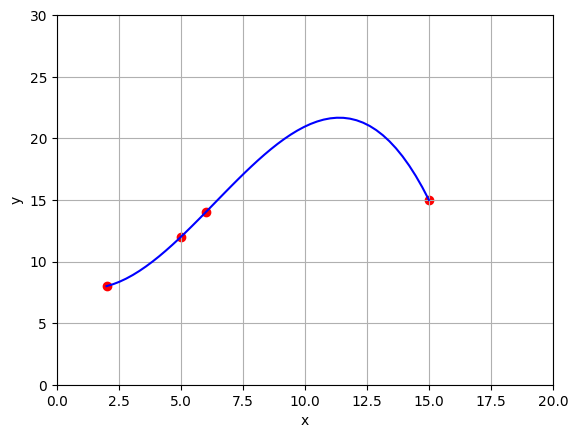

In [4]:
x_fit = np.linspace(x[0],x[3],50)
y_fit = coeffs[0] + coeffs[1]*x_fit + coeffs[2]*x_fit**2 + coeffs[3]*x_fit**3

fig,ax = plt.subplots()

ax.scatter(x,y,color='red');
ax.plot(x_fit,y_fit,'b');
ax.set_xlim(0,20);
ax.set_ylim(0,30);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.grid(True);

Although the curve that we produce does indeed pass through each of the data points, this polynomial may not be the best model of the underlying process.  One potential concern is that the curve does not seem to connect the third and fourth data point in a direct way, but rather exhibits an oscillation.  When constructing a curve to fit a set of data points, there are other factors that may be more important than simply requiring that the curve passes through each point.  In a later chapter we will revisit the problem and consider the idea of finding a curve that "fits" the data without actually passing through each point. 

#### Exercises

**Exercise 1:** In 2017, researchers from the Universities of British Columbia, Alberta, and Toronto published their findings regarding the population of snowshoe hares around Kluane Lake, Yukon. They measured the density of hares per hectare, taking a reading once every two years. Here are some of their measurements:

| Measurement #    | Density per ha. |
| ---------------- | --------------- |
| 1                | 0.26            |
| 2                | 0.20            |
| 3                | 1.17            |
| 4                | 2.65            |
| 5                | 0.14            |
| 6                | 0.42            |
| 7                | 1.65            |
| 8                | 2.73            |
| 9                | 0.09            |
| 10               | 0.21            |

$(a)$ Find the unique ninth degree polynomial whose graph passes through each of these points.  Plot the data points together with the graph of the polynomial to observe the fit.
   
$(b)$ Using the polynomial that we found, what should we expect the density of hares to be if we measured their population in the year between the third and fourth measurement? What about between the fourth and the fifth?
 
$(c)$ Why might this method of interpolation not be an appropriate model of our data over time?

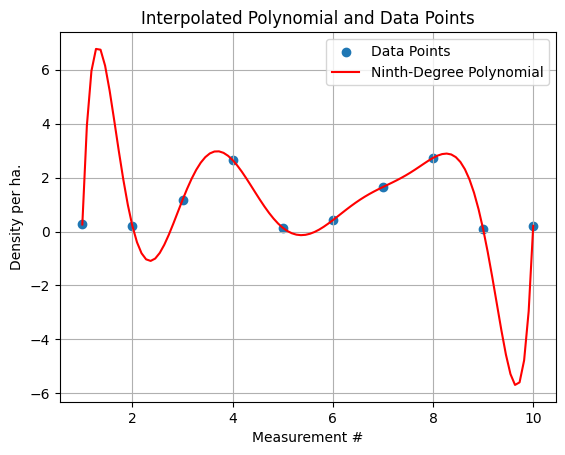

between 3 and 4: 2.8275027092058735
between 4 and 5: 1.308857380883211


In [5]:
# a)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0.26, 0.20, 1.17, 2.65, 0.14, 0.42, 1.65, 2.73, 0.09, 0.21])

A = np.zeros((10, 10))
B = np.zeros((10, 1))

for i in range(10):
    B[i, 0] = y[i]
    for j in range(10):
        A[i, j] = x[i]**j

coeffs = lag.SolveSystem(A, B)

x_fit = np.linspace(x[0], x[9], 100)
y_fit = np.polyval(coeffs[::-1], x_fit)

plt.scatter(x, y, label='Data Points')
plt.plot(x_fit, y_fit, label='Ninth-Degree Polynomial', color='red')
plt.xlabel('Measurement #')
plt.ylabel('Density per ha.')
plt.legend()
plt.title('Interpolated Polynomial and Data Points')
plt.grid(True)
plt.show()


# b)

print('between 3 and 4:', (y_fit[27] + y_fit[28])/2)
print('between 4 and 5:', (y_fit[38] + y_fit[39])/2)

# c)
# There are lots of jumps, as it may overfit the graph.
# As polynomial degrees increase, the graph could have different
# kind of behavior, and may also not fit the graph in future 
# data points if it is out of range.

**Exercise 2:** The further you travel out into the solar system and away from the Sun, the slower an object must be travelling to remain in its orbit. Here are the average radii of the orbits of the planets in our solar system, and their average orbital velocity around the Sun.

|Planet                           | Distance from Sun (million km)  | Orbital Velocity (km/s)         |
| ------------------------------- | ------------------------------- | ------------------------------- |
|Mercury                          | 57.9                            | 47.4                            |
|Venus                            | 108.2                           | 35.0                            | 
|Earth                            | 149.6                           | 29.8                            |
|Mars                             | 228.0                           | 24.1                            |
|Jupiter                          | 778.5                           | 13.1                            |
|Saturn                           | 1432.0                          | 9.7                             |
|Uranus                           | 2867.0                          | 6.8                             |
|Neptune                          | 4515.0                          | 5.4                             |

$(a)$ Find the unique first degree polynomial whose graph passes through points defined by Mercury and Jupiter.  Plot the data points together with the graph of the polynomial to observe the fit. Amend your polynomial and graph by adding Saturn, and then Earth. What do you notice as you add more points? What if you had started with different planets?
   
$(b)$ Expand your work in part $(a)$ to a seventh degree poynomial that passes through all eight planets. The first object in the Kuiper Belt, Ceres, was discovered by Giuseppe Piazzi in 1801. Ceres has an average distance from the sun of 413.5 million km. Based on the points on the graph, estimate the orbital velocity of Ceres. What does the polynomial suggest the value would be?

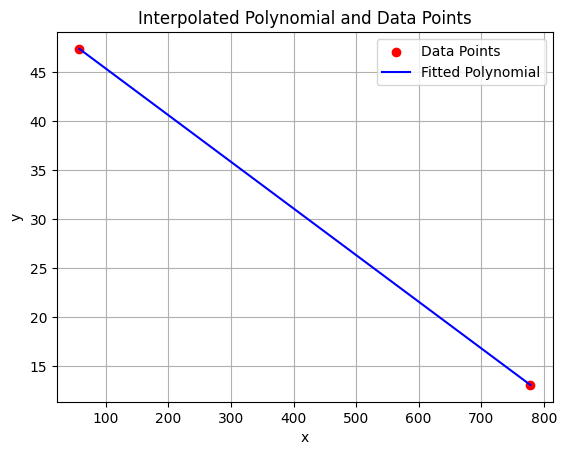

In [6]:
## Code solution here.
# a)
x = np.array([57.9, 778.5])
y = np.array([47.4, 13.1])
A = np.zeros((2,2))
B = np.zeros((2,1))
for i in range(2):
    B[i,0] = y[i]
    for j in range(2):
        A[i,j] = x[i]**(j)
coeffs = lag.SolveSystem(A,B)
x_fit = np.linspace(x[0], x[1], 100)
y_fit = coeffs[0] + coeffs[1]*x_fit
fig, ax = plt.subplots()
ax.scatter(x, y, color='red', label='Data Points')
ax.plot(x_fit, y_fit, 'b', label='Fitted Polynomial')
ax.grid(True)
ax.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated Polynomial and Data Points')
plt.show()

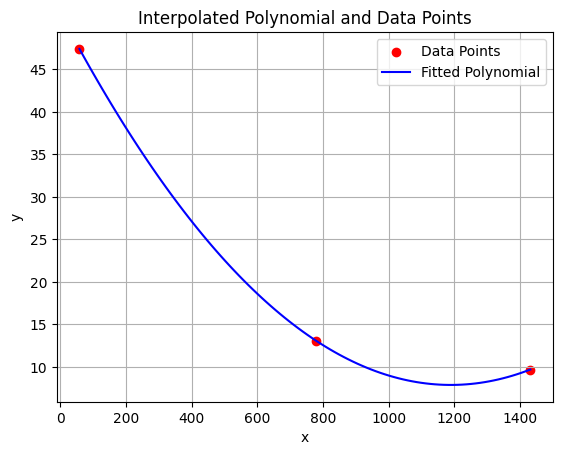

In [7]:
## Code solution here.
# a) add saturn
x = np.array([57.9, 778.5, 1432.0])
y = np.array([47.4, 13.1,9.7])
A = np.zeros((3,3))
B = np.zeros((3,1))
for i in range(3):
    B[i,0] = y[i]
    for j in range(3):
        A[i,j] = x[i]**(j)
coeffs = lag.SolveSystem(A,B)
x_fit = np.linspace(x[0], x[2], 100)
y_fit = np.polyval(coeffs[::-1], x_fit)
fig,ax = plt.subplots()
ax.scatter(x, y, color='red', label='Data Points')
ax.plot(x_fit, y_fit, 'b', label='Fitted Polynomial')
ax.grid(True)
ax.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated Polynomial and Data Points')
plt.show()

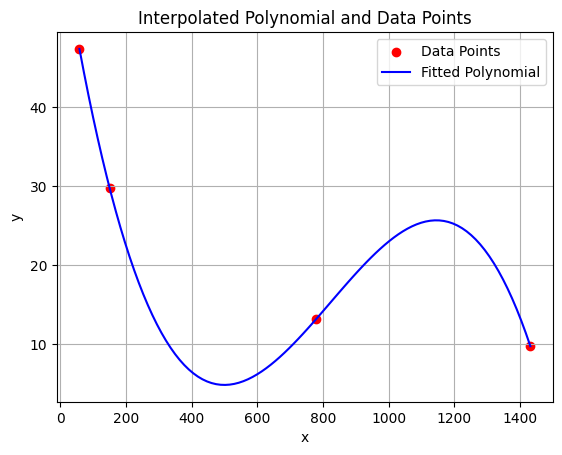

In [8]:
# a) adding Earth
x = np.array([57.9, 149.6, 778.5, 1432.0])
y = np.array([47.4, 29.8, 13.1, 9.7])

# Create the coefficient matrix and the right-hand side vector
A = np.zeros((4, 4))
B = np.zeros((4, 1))

for i in range(4):
    B[i, 0] = y[i]
    for j in range(4):
        A[i, j] = x[i] ** j

coeffs = np.linalg.solve(A, B)
x_fit = np.linspace(x[0], x[3], 100)
y_fit = np.polyval(coeffs[::-1], x_fit)

fig, ax = plt.subplots()
ax.scatter(x, y, color='red', label='Data Points')
ax.plot(x_fit, y_fit, 'b', label='Fitted Polynomial')
ax.grid(True)
ax.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated Polynomial and Data Points')
plt.show()


## a)
As the Polynomial increases, there are more inflections, concave up/concave down as we add more points. As we add more planets im sure it will look different.

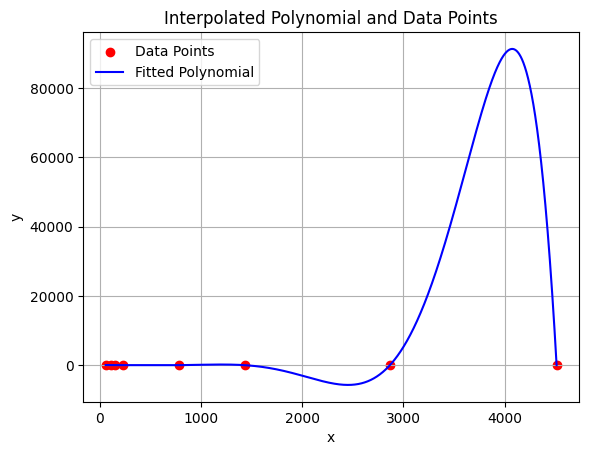

In [9]:
## Code solution here.
x = np.array([57.9, 108.2, 149.6, 228.0, 778.5, 1432.0, 2867.0, 4515.0])
y = np.array([47.4, 35.0, 29.8, 24.1, 13.1, 9.7, 6.8, 5.4])

A = np.zeros((8, 8))
B = np.zeros((8, 1))

for i in range(8):
    B[i, 0] = y[i]
    for j in range(8):
        A[i, j] = x[i] ** j

coeffs = np.linalg.solve(A, B)
x_fit = np.linspace(x[0], x[7], 4458)
y_fit = np.polyval(coeffs[::-1], x_fit)
fig, ax = plt.subplots()
ax.scatter(x, y, color='red', label='Data Points')
ax.plot(x_fit, y_fit, 'b', label='Fitted Polynomial')
ax.grid(True)
ax.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated Polynomial and Data Points')
plt.show()

## Cryptography (Application#2)

One of the primary goals of cryptography is to secure communications by encoding messages.  The encoded message is difficult to read by anyone except for the intended recipient, who possesses some secret knowledge that allows them to reverse the process and decode the message.  The original message is known as _plaintext_, and the encoded message is known as _ciphertext_.  We demonstrate here the well-known Hill Cipher, which is a method of transforming plaintext to ciphertext using familiar matrix multiplication.

#### Encryption

Let's assume that the plaintext and ciphertext will be made up of characters from the same predefined _alphabet_.  This alphabet can contain letters, numbers, punctuation, and any number of other symbols that might be appropriate.  We also need a square invertible matrix $B$, called the encryption matrix.  Given these parameters, we take the following steps to get from plaintext to ciphertext.

1. Translate the plaintext from alphabet characters into a list of numbers.
2. Divide the list of numbers into a collection of $N\times 1$ vectors.  Use these numbers as columns in a plaintext array $P$.
3. Apply the cipher by multiplying each vector by the matrix $B$.  This produces a ciphertext array $C=BP$.
4. Translate the columns of $C$ back into a string of alphabet characters.

In order to get started, we first need a way to transform a message that includes letters, numbers, and possibly other characters, into to a message that consists of only numbers.  The easiest thing to do is to substitute each possible character in the message for a number.  For example we might let A=1, B=2, C=3, and so on.  In order to make this process less obvious, we might scramble the order of the numbers (A=23, B=5, C=12, ...), or substitute single numbers for common groups of letters (TH=32, EE=20, ING=17, ...).  However we choose to convert our message from text to numbers, there will still be patterns that remain among the numbers due to the natural patterns of the underlying language.  

For the purpose of this demonstration, we will make use of a list named $\texttt{alphabet}$ to convert between letters and numbers.  This list is included in the $\texttt{hillcipher}$ module, which contains some other functions that we will need.  If we print the list, we can see that it contains a space, a period, a question mark, and all uppercase letters.   

In [10]:
import hillcipher as hc
print(hc.alphabet)

[' ', '.', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


To find which character goes with which number, we can use the number as an index to the list as usual.

In [11]:
num = 2
char = hc.alphabet[num]
print("The character",char,"is associated with the number",num,".")

The character ? is associated with the number 2 .


To find which number is associated with each letter, we need to look up the index for that letter. 

In [12]:
char = 'R'
num = hc.alphabet.index(char)
print("The number",num,"is associated with the character",char,".")

The number 20 is associated with the character R .


Note that the code in the first cell will produce an error if we choose an index that is larger than 28, and the code in the second cell will produce an error if we choose a letter that is not in $\texttt{alphabet}$. 

To complete this step of the encryption, we write a loop that builds a list of numbers corresponding to each letter in a message and define a NumPy array based on that list.

In [13]:
plaintext = "WE DONT HAVE NUMBERS IN OUR ALPHABET.  WE HAVE TO SPELL TWO."
number_message = []
    
for char in plaintext:
    number_message.append(hc.alphabet.index(char))
    
array_message = np.array(number_message)
print(array_message)

[25  7  0  6 17 16 22  0 10  3 24  7  0 16 23 15  4  7 20 21  0 11 16  0
 17 23 20  0  3 14 18 10  3  4  7 22  1  0  0 25  7  0 10  3 24  7  0 22
 17  0 21 18  7 14 14  0 22 25 17  1]


The next step is to arrange our numerical message into the plaintext array $P$ which must have dimensions compatible with our encryption matrix $B$.  We will choose $B$ to be a $4\times 4$ matrix for this example.

$$
B = \left[ \begin{array}{rrrr} 1 & 0 & -2 & -1 \\ 3 & -1 & -3 & 2 \\ 2 & 0 & -4 & 4 \\ 2 & 1 & -1 & -1 \end{array}\right]
$$

We now take the plaintext message and break it into chunks which contain 4 numbers each.  (*Note that if the number of characters in our message is not divisible by 4, we can add extra characters at the end.*)  Each chunk will form a column of $P$, and we will have as many columns as needed to accommodate the entire message.  We make use of the $\texttt{reshape}$ and $\texttt{transpose}$ methods to manipulate the entries in the array.

In [14]:
# Find the number of chucks needed.
chunks = int(len(number_message)/4)
P = array_message.reshape((chunks,4))
P = P.transpose()
print(P)

[[25 17 10  0  4  0 17  3  3  1  7 24 17  7 22]
 [ 7 16  3 16  7 11 23 14  4  0  0  7  0 14 25]
 [ 0 22 24 23 20 16 20 18  7  0 10  0 21 14 17]
 [ 6  0  7 15 21  0  0 10 22 25  3 22 18  0  1]]


The next step is one multiplication multiplication. 

In [15]:
B = np.array([[1,0,-2,-1],[3,-1,-3,2],[2,0,-4,4],[2,1,-1,-1]])
C = B@P
print(C)

[[ 19 -27 -45 -61 -57 -32 -23 -43 -33 -24 -16   2 -43 -21 -13]
 [ 80 -31 -31 -55 -13 -59 -32 -39  28  53  -3 109  24 -35  -8]
 [ 74 -54 -48 -32  12 -64 -46 -26  66 102 -14 136  22 -42 -20]
 [ 51  28  -8 -22 -26  -5  37  -8 -19 -23   1  33  -5  14  51]]


The final task is to translate the numbers in $C$ back to characters of the alphabet.  This step requires a bit more thought since most of the numbers in $C$ are outside the index range of the alphabet (0-28).  We can let these numbers be associated with letters by letting the count wrap around at 29.  That is, 29 is associated with the same character as 0, 30 is associated with the same character as 1, and so forth.  We can also let -1 be associated with the same character as 28, -2 be associated with the same character as 27, and so forth to address negative numbers.  This concept is known as *congruence* in *modular arithmetic* and is performed using the $\texttt{%}$ operator in Python.  Try it out!   

In [16]:
print(80%29)

22


With that detail in place, we can step through the elements of $C$ and generate the final encrypted message from the characters in our alphabet.  

In [17]:
# We begin with an empty string and add one character for each entry in C
encrypted_message = ''

for j in range(C.shape[1]):  # For each column j ...
    for i in range(C.shape[0]):  # ... we step through each row i and add a letter for that entry
        encrypted_message = encrypted_message + hc.alphabet[C[i,j]%29]
        
print(encrypted_message)

QTNT?YBZKYHSXAXE.NJAXZUVDXJFMQASWZFHCVMDKXM.?TRBMVTVFUNLNSGT


Notice that this last step of the process cannot be reversed.  It is not possible to start with the encrypted message and determine the ciphertext array $C$.  Indeed, there are an infinite number of matrices that could have generated this same encrypted message since any of the entries can be have a multiple of 29 added to it.

#### Decryption

If the encryption matrix $B$ is known, we might hope to multiply by the inverse matrix to determine the plaintext array $P = B^{-1}C$.  As we just noted however, we cannot reconstruct $C$ from the encrypted message.  To overcome this difficulty, we need to find the *modular inverse* of the matrix $B$.  That is, we need a matrix $B^{-1}$ such that the entries of $B^{-1}B$ are congruent to the entries of $I$ in the modular arithmetic.  (*Note that we use the same symbol for the modular inverse as we do for the usual inverse matrix.*)

The method for finding the modular inverse is beyond our scope, but we will make use of the $\texttt{ModularInverseMatrix}$ function in the $\texttt{hillcipher}$ module to calculate $B^{-1}$ for the purpose of demonstration.

In [18]:
B_inv = hc.ModularInverseMatrix(B)
print(B_inv,'\n')
print(B_inv@B,'\n')
print((B_inv@B)%29)

[[-300  300 -150  300]
 [-150 -450  300  450]
 [-450  150 -150  150]
 [-300    0  150    0]] 

[[900   0   0   0]
 [  0 900   0   0]
 [  0   0 900   0]
 [  0   0   0 900]] 

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


What is important to observe here is that $B^{-1}B$ is not exactly $I$, but is congruent to $I$ if we work out the equivalent number between 0 and 28 for each entry.  To proceed with the decryption, we assemble the encrypted message into an array (we call it $\texttt{decryptionC}$ to avoid confusion) and multiply by $B^{-1}$. 

In [19]:
number_of_columns = int(len(encrypted_message)/4)
decryptionC = np.zeros((4,number_of_columns),dtype='int')

# For each column, we step down the column and fill in with the characters of the encrypted messsage.

k = 0
for j in range(number_of_columns):  
    for i in range(4):
        decryptionC[i,j] = hc.alphabet.index(encrypted_message[k])
        k += 1

decryptionP = B_inv@decryptionC
        
print(decryptionC)
print('\n')
print(decryptionP)

[[19  2 13 26  1 26  6 15 25  5 13  2 15  8 16]
 [22 27 27  3 16 28 26 19 28 24 26 22 24 23 21]
 [16  4 10 26 12 23 12  3  8 15 15 20 22 16  9]
 [22 28 21  7  3 24  8 21 10  6  1  4 24 14 22]]


[[  5100  15300   9000  -8700   3600   4350   6600   7050   2700   5250
    1950   4200   6600   6300   6750]
 [  1950   1350  -1650   5700  -2400   1200  -5400   -450  -9450  -4350
   -8700  -2400   4350   -450    750]
 [ -4350   6750   -150 -14100    600  -7350    600  -1200  -6750      0
   -4050      0  -2850   -450  -2100]
 [ -3300      0  -2400  -3900   1500  -4350      0  -4050  -6300    750
   -1650   2400  -1200      0  -3450]]


Again, multiplication by $B^{-1}$ produces numbers that are outside of the range 0-28, so again we apply modular congruence before translating the numbers back into characters in the alphabet.

In [20]:
decrypted_message = ''
for j in range(number_of_columns):
    for i in range(4):
        decrypted_message = decrypted_message + hc.alphabet[decryptionP[i,j]%29]

print(decrypted_message)

WE DONT HAVE NUMBERS IN OUR ALPHABET.  WE HAVE TO SPELL TWO.


#### Exercises

The $\texttt{hillcipher}$ module contains two functions that carry out the same steps we have demonstrated here to encrypt/decrypt a message using the included alphabet.  The following cell shows how they are called.

In [21]:
msg = "Water in short supply.  Send help soon!"
en_msg = hc.HillCipherEncryption(msg,B)
print(en_msg)

de_msg = hc.HillCipherDecryption(en_msg,B)
print(de_msg)

! is not included in the current alphabet.
ARQVI.?KSJZUZTFJ?W.AYTWXJR?Y.XZPOWRYCXKT
WATER IN SHORT SUPPLY.  SEND HELP SOONKM


Note that these functions do some error checking of the original message to be sure that all letters are in uppercase, and no characters outside the alphabet are included in the message that gets encrypted.

**Exercise 1:** Create your own encryption matrix and apply the steps above to encrypt a message of your choosing.  Check the results with those produced by $\texttt{HillCipherEncryption}$.

In [22]:
B = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1],
              [-11, -20, 20, -49],
              [11, 24, 4, -1]])

msg = "Hiya Im right in front of you"

spaces = 4 - len(msg) % 4
msg += ' ' * spaces

number_message = [ord(char) - ord('A') for char in msg]

chunks = len(number_message) // 4

encrypted_message = ''
for i in range(chunks):
    chunk = np.array(number_message[i * 4:(i + 1) * 4])
    encrypted_chunk = B @ chunk % 26 
    encrypted_message += ''.join([chr(num + ord('A')) for num in encrypted_chunk])

print("Original message:", msg)
print("Encrypted message:", encrypted_message)


Original message: Hiya Im right in front of you   
Encrypted message: TGBHJZWMJPGAZWUOITNZYBRHLZDBPKFT


**Exercise 2:** Create your own alphabet list to translate messages into numbers.

In [23]:
custom_alphabet = " @#$%&!ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"  # Modify this according to your needs
custom_char = np.array(list(custom_alphabet))
msg1 = "I am right behind you!!"

number_message = [custom_char.tolist().index(char) for char in msg1]

print(msg1)
print("Numeric representation of the message:", number_message)


I am right behind you!!
Numeric representation of the message: [15, 0, 33, 45, 0, 50, 41, 39, 40, 52, 0, 34, 37, 40, 41, 46, 36, 0, 57, 47, 53, 6, 6]


### References

- Anton, Howard and Chris Rorres. *Elementary Linear Algebra Applications Version*. 8th ed., John Wiley & Sons Inc., 2000. 

- Krebs, Charles J.; Boonstra, Rudy; Boutin, Stan (2017), Using experimentation to understand the 10‐year snowshoe hare cycle in the boreal forest of North America, Journal of Animal Ecology, Article-journal, https://doi.org/10.1111/1365-2656.12720

- Kwak, Jin Ho and Sungpyo Hong.  *Linear Algebra*. 2nd ed., Birkhauser., 2004.

- Williams, David, *Planetary Fact Sheet*, https://nssdc.gsfc.nasa.gov/planetary/factsheet/, NASA Goddard Space Flight Center, 2021